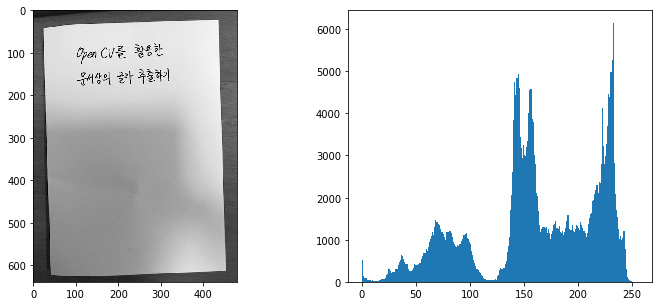

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load our new image
image = cv2.imread('images/paper_scan.jpg', 0)


plt.figure(figsize=(12,5))
plt.subplot(1,2,1) # 문서사진 출력하기
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2) # 히스토그램으로 출력하기
plt.hist(image.ravel(), 256, [0, 256])
plt.show()


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images/paper_scan.jpg', 0)
cv2.imshow('Original', image)
cv2.waitKey(0) 

# 127 낮으면 0(흑색)으로, 높으면 255 (흰색)로 
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('Threshold Binary', thresh1)
cv2.waitKey(0) 

# 노이즈를 제거하기 위해 가우시안 Blur를 적용
image = cv2.GaussianBlur(image, (5, 5), 0)  # 5 크기로 설정

# Mean adaptiveThreshold 적용
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY, 3, 5) 
cv2.imshow("Adaptive Mean Thresholding", thresh) 
cv2.waitKey(0) 

# Otsu thresholding 적용
_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow("Otsu's Thresholding", thresh) 
cv2.waitKey(0) 

# 가우시안 Blur 이후에 Otsu's thresholding 적용
blur = cv2.GaussianBlur(image, (7,7), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow("Guassian Otsu's Thresholding", thresh) 
cv2.waitKey(0) 

cv2.destroyAllWindows()